# <center> Содержание
* [Основные понятия статистики](#1)
* [Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom](#2)
* [Среднее значение случайной величины](#3) statistics.**mean**
* [Медиана](#4) statistics.**median**
* [Мода](#5) statistics.**mode**
* [Минимум и максимум](#6) min max
* [Выбросы](#7) смотрим на частотный график **scatter** или на **boxplot**
* [Стандартное отклонение - standard deviation](#8) statistics.**pstdev**
* [Дисперсия - Variance](#9) statistics.**pvariance**
* [Размах](#10) duration_range = max(duration) - min(duration)
* [Коррелляция](#11) plt.scatter(**parameter_one**, **parameter_two**, marker='.')
* [Нормальное распределение](#12) через plt.scatter
* [Частотный график](#13) через plt.hist
* [Равномерное распределение на отрезке](#14)
* [Нормализация данных](#15)

<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

import ssl
import seaborn as sns

Загрузить датасет по url:


In [4]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         156 non-null    object 
 1   Ladder                   156 non-null    int64  
 2   SD of Ladder             156 non-null    int64  
 3   Positive affect          155 non-null    float64
 4   Negative affect          155 non-null    float64
 5   Social support           155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption               148 non-null    float64
 8   Generosity               155 non-null    float64
 9   Log of GDP
per capita    152 non-null    float64
 10  Healthy life
expectancy  150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


Посмотреть первые несколько рядов таблицы

In [7]:
df.head()

Country (region)  Ladder  SD of Ladder  Positive affect  Negative affect  \
0          Finland       1             4             41.0             10.0   
1          Denmark       2            13             24.0             26.0   
2           Norway       3             8             16.0             29.0   
3          Iceland       4             9              3.0              3.0   
4      Netherlands       5             1             12.0             25.0   

   Social support  Freedom  Corruption  Generosity  Log of GDP\nper capita  \
0             2.0      5.0         4.0        47.0                    22.0   
1             4.0      6.0         3.0        22.0                    14.0   
2             3.0      3.0         8.0        11.0                     7.0   
3             1.0      7.0        45.0         3.0                    15.0   
4            15.0     19.0        12.0         7.0                    12.0   

   Healthy life\nexpectancy  
0                      27.0  
1                      23.0  
2                      12.0  
3                      13.0  
4                      18.0

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

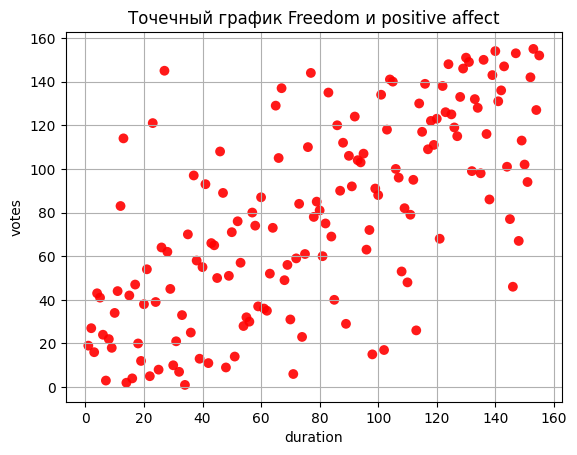

In [25]:
freedom = df['Freedom']
positive_affect = df['Positive affect']
fig, ax = plt.subplots()
ax.scatter(freedom, positive_affect,marker='.', c='red', alpha=0.9, edgecolors='none',s=200)

ax.grid(True)
plt.xlabel('duration')
plt.ylabel('votes')
plt.title('Точечный график Freedom и positive affect')
plt.show()

Походит на нормальное

### Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom <a class="anchor" id="2"></a>

In [40]:
df['Freedom'].loc[df['Freedom'].isna()]

28   NaN
Name: Freedom, dtype: float64

In [27]:
df['Freedom']

0        5.0
1        6.0
2        3.0
3        7.0
4       19.0
       ...  
151     21.0
152     78.0
153    155.0
154    133.0
155    154.0
Name: Freedom, Length: 156, dtype: float64

In [46]:
statistics.mean(int(df['Freedom']))

TypeError: cannot convert the series to <class 'int'>

In [42]:
np.mean(df['Freedom'])

78.0

In [49]:
df['Freedom'].sum(axis=0)

12090.0

In [51]:
len(df['Freedom'])

156

# Если есть одно пропущенное значение выводит nan

In [57]:
np.sum([1,np.nan])

nan

In [50]:
df['Freedom'].sum(axis=0)/len(df['Freedom'])

77.5

In [58]:
df['Freedom'].loc[~df['Freedom'].isna()]

0        5.0
1        6.0
2        3.0
3        7.0
4       19.0
       ...  
151     21.0
152     78.0
153    155.0
154    133.0
155    154.0
Name: Freedom, Length: 155, dtype: float64

In [59]:
print('Значение моды: ', statistics.mean(df['Freedom'].loc[~df['Freedom'].isna()]))

78.0

In [60]:
bf = df['Freedom'].loc[~df['Freedom'].isna()].copy(deep=True)

In [64]:
bf.head()

0     5.0
1     6.0
2     3.0
3     7.0
4    19.0
Name: Freedom, dtype: float64

In [63]:
print('Медиана: ', statistics.median(bf))

Медиана:  78.0


In [81]:
print(f'Значение моды:{statistics.mode(bf)}\nоднако Всех значений по одному')
bf.value_counts()

Значение моды:5.0
однако Всех значений по одному


Freedom
5.0      1
145.0    1
88.0     1
103.0    1
92.0     1
        ..
144.0    1
45.0     1
49.0     1
40.0     1
154.0    1
Name: count, Length: 155, dtype: int64

In [67]:
print('Математическое ожидание: ', statistics.mean(bf))

Математическое ожидание:  78.0


In [ ]:
np.std()

In [69]:
print('стандартное отклонение : ', np.std(bf))

стандартное отклонение :  44.74371464239419


In [71]:
print('дисперсия: ', np.var(bf))

 дисперсия :  2002.0


In [72]:
min(bf)

1.0

In [73]:
max(bf)

155.0

In [77]:
freedom_range = max(bf) - min(bf)
print(f'размах: {freedom_range}')

размах: 154.0


Есть ли выбросы

<Axes: >

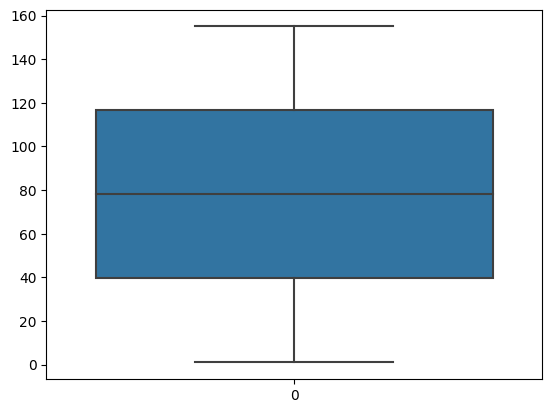

In [75]:
sns.boxplot(bf)

Почему нельзя найти моду?

In [78]:
bf.value_counts()

Freedom
5.0      1
145.0    1
88.0     1
103.0    1
92.0     1
        ..
144.0    1
45.0     1
49.0     1
40.0     1
154.0    1
Name: count, Length: 155, dtype: int64

Всех значений по одному

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

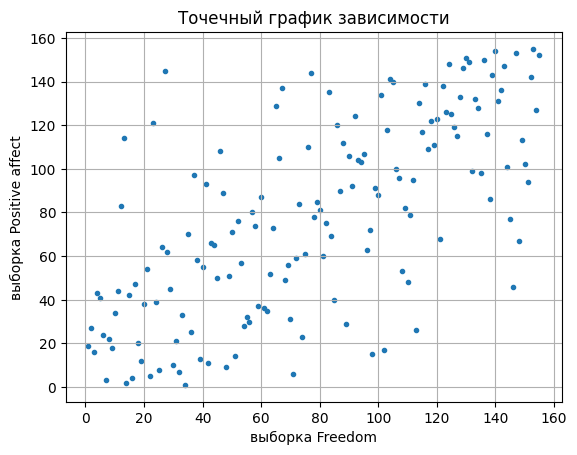

In [83]:
Freedom = df['Freedom']
positive_affect = df['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости')
plt.grid(True)
plt.scatter(Freedom, positive_affect, marker='.')

In [88]:
positive_affect.loc[~positive_affect.isna()]

0       41.0
1       24.0
2       16.0
3        3.0
4       12.0
       ...  
151     54.0
152     78.0
153    152.0
154    132.0
155    127.0
Name: Positive affect, Length: 155, dtype: float64

Коэффициент корреляции Пирсона: 0.6817698430601656


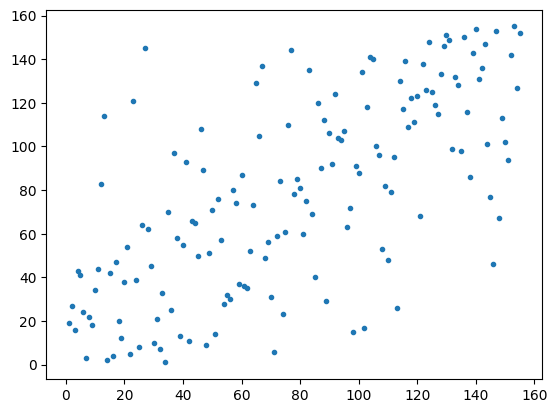

In [89]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(bf, positive_affect.loc[~positive_affect.isna()])
plt.scatter(bf, positive_affect.loc[~positive_affect.isna()], marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [13]:
df_centered = df['Freedom'].loc[~df['Freedom'].isna()]

In [14]:
df_centered = df_centered.apply(lambda x: x-statistics.mean(df_centered))

In [15]:
df_centered

0     -73.0
1     -72.0
2     -75.0
3     -71.0
4     -59.0
       ... 
151   -57.0
152     0.0
153    77.0
154    55.0
155    76.0
Name: Freedom, Length: 155, dtype: float64

In [8]:
print(statistics.mean(df['Freedom'].loc[~df['Freedom'].isna()]))

78.0


In [12]:
df['Freedom'].loc[~df['Freedom'].isna()]

0        5.0
1        6.0
2        3.0
3        7.0
4       19.0
       ...  
151     21.0
152     78.0
153    155.0
154    133.0
155    154.0
Name: Freedom, Length: 155, dtype: float64

In [11]:
df_centered.loc[df_centered.isna()]

28   NaN
Name: Freedom, dtype: float64

In [16]:
print(statistics.mean(df_centered))

0.0


In [17]:
df_centered

0     -73.0
1     -72.0
2     -75.0
3     -71.0
4     -59.0
       ... 
151   -57.0
152     0.0
153    77.0
154    55.0
155    76.0
Name: Freedom, Length: 155, dtype: float64

In [18]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

duration = min_max_scaler.fit_transform(np.array(df_centered).reshape(-1, 1))
print(min(duration))
print(max(duration))

[-1.]
[1.]


In [19]:
duration

array([[-0.94805195],
       [-0.93506494],
       [-0.97402597],
       [-0.92207792],
       [-0.76623377],
       [-0.87012987],
       [-0.88311688],
       [-0.90909091],
       [-0.8961039 ],
       [-0.67532468],
       [-0.79220779],
       [-0.80519481],
       [ 0.19480519],
       [-0.64935065],
       [-0.19480519],
       [-0.58441558],
       [-0.44155844],
       [-0.32467532],
       [-0.20779221],
       [-0.25974026],
       [-0.96103896],
       [-0.85714286],
       [-0.09090909],
       [-0.11688312],
       [ 0.31168831],
       [ 0.25974026],
       [-0.68831169],
       [-0.12987013],
       [ 0.22077922],
       [-0.5974026 ],
       [ 0.07792208],
       [-0.62337662],
       [-0.75324675],
       [-0.05194805],
       [ 0.7012987 ],
       [-0.7012987 ],
       [ 0.38961039],
       [-0.35064935],
       [-0.33766234],
       [-1.        ],
       [ 0.57142857],
       [-0.28571429],
       [-0.84415584],
       [-0.1038961 ],
       [-0.36363636],
       [-0

Построить матрицу корреляций для всех колонок таблицы

In [25]:
bf = df.drop(columns='Country (region)')

In [26]:
bf.corr()

Ladder  SD of Ladder  Positive affect  \
Ladder                    1.000000      0.539362         0.491432   
SD of Ladder              0.539362      1.000000         0.085381   
Positive affect           0.491432      0.085381         1.000000   
Negative affect           0.523643      0.619267         0.389697   
Social support            0.817842      0.599464         0.386269   
Freedom                   0.546777      0.251856         0.681770   
Corruption                0.190071      0.258639         0.209659   
Generosity                0.497856      0.392154         0.354877   
Log of GDP\nper capita    0.813367      0.629662         0.304522   
Healthy life\nexpectancy  0.816740      0.611376         0.332839   

                          Negative affect  Social support   Freedom  \
Ladder                           0.523643        0.817842  0.546777   
SD of Ladder                     0.619267        0.599464  0.251856   
Positive affect                  0.389697        0.386269  0.681770   
Negative affect                  1.000000        0.621888  0.430241   
Social support                   0.621888        1.000000  0.448903   
Freedom                          0.430241        0.448903  1.000000   
Corruption                       0.158903        0.118434  0.381304   
Generosity                       0.338226        0.442432  0.489991   
Log of GDP\nper capita           0.542143        0.772912  0.409501   
Healthy life\nexpectancy         0.488649        0.740728  0.416263   

                          Corruption  Generosity  Log of GDP\nper capita  \
Ladder                      0.190071    0.497856                0.813367   
SD of Ladder                0.258639    0.392154                0.629662   
Positive affect             0.209659    0.354877                0.304522   
Negative affect             0.158903    0.338226                0.542143   
Social support              0.118434    0.442432                0.772912   
Freedom                     0.381304    0.489991                0.409501   
Corruption                  1.000000    0.266138                0.198581   
Generosity                  0.266138    1.000000                0.478739   
Log of GDP\nper capita      0.198581    0.478739                1.000000   
Healthy life\nexpectancy    0.123132    0.431620                0.847580   

                          Healthy life\nexpectancy  
Ladder                                    0.816740  
SD of Ladder                              0.611376  
Positive affect                           0.332839  
Negative affect                           0.488649  
Social support                            0.740728  
Freedom                                   0.416263  
Corruption                                0.123132  
Generosity                                0.431620  
Log of GDP\nper capita                    0.847580  
Healthy life\nexpectancy                  1.000000

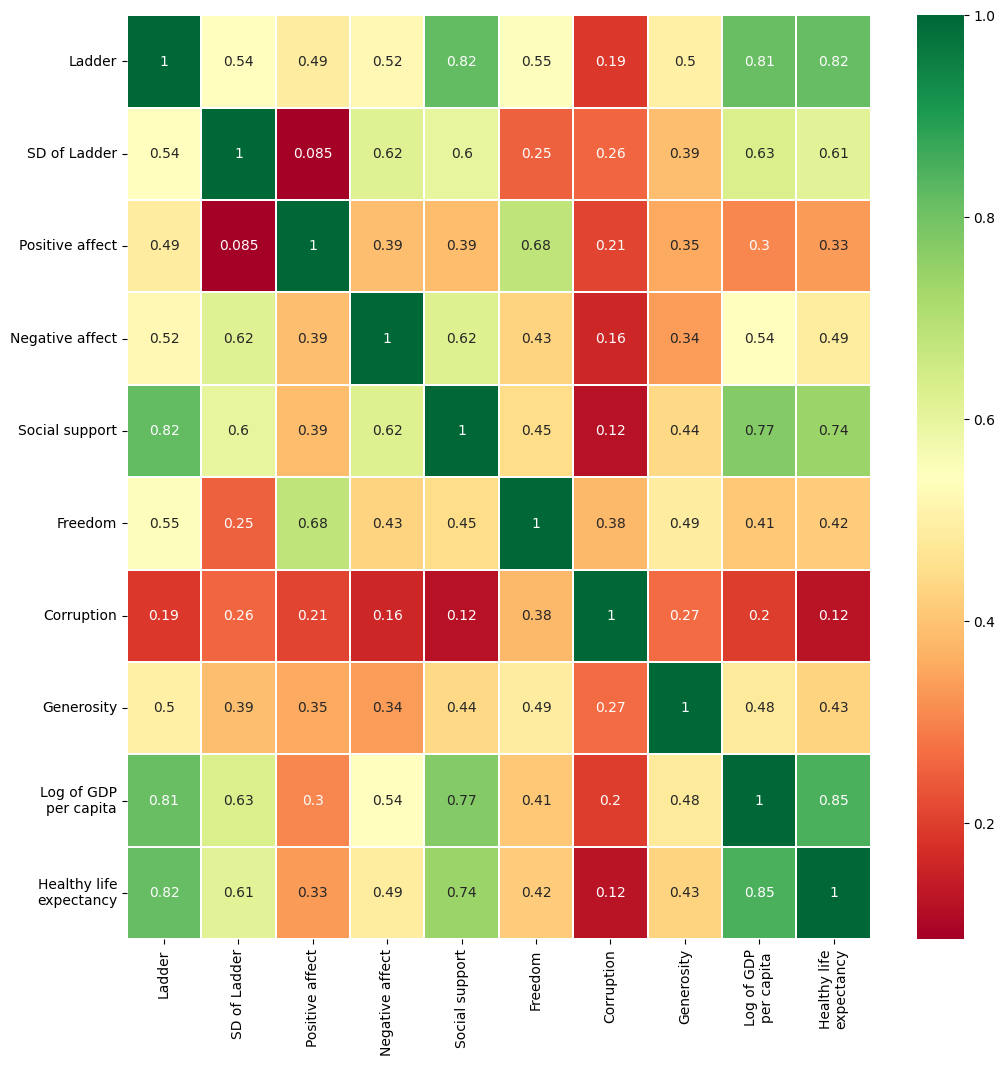

In [27]:
import seaborn as sns
sns.heatmap(bf.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_sibze_inches(12,12)
plt.show()

In [29]:
df['Country (region)'].unique()

array(['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands',
       'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria',
       'Australia', 'Costa Rica', 'Israel', 'Luxembourg',
       'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States',
       'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico',
       'France', 'Taiwan', 'Chile', 'Guatemala', 'Saudi Arabia', 'Qatar',
       'Spain', 'Panama', 'Brazil', 'Uruguay', 'Singapore', 'El Salvador',
       'Italy', 'Bahrain', 'Slovakia', 'Trinidad and Tobago', 'Poland',
       'Uzbekistan', 'Lithuania', 'Colombia', 'Slovenia', 'Nicaragua',
       'Kosovo', 'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Kuwait',
       'Thailand', 'Latvia', 'South Korea', 'Estonia', 'Jamaica',
       'Mauritius', 'Japan', 'Honduras', 'Kazakhstan', 'Bolivia',
       'Hungary', 'Paraguay', 'Northern Cyprus', 'Peru', 'Portugal',
       'Pakistan', 'Russia', 'Philippines', 'Serbia', 'Moldova', 'Libya',
       'Montenegro', 'Tajik

In [35]:
df['Country (region)'].nunique()

156

In [30]:
text_features = ['Country (region)']

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [32]:
cf = df.copy(deep=True)

In [33]:
for col in text_features:
    cf[col] = label_encoder.fit_transform(cf[col]) + 1

In [34]:
cf

Country (region)  Ladder  SD of Ladder  Positive affect  Negative affect  \
0                  44       1             4             41.0             10.0   
1                  37       2            13             24.0             26.0   
2                 106       3             8             16.0             29.0   
3                  58       4             9              3.0              3.0   
4                 100       5             1             12.0             25.0   
..                ...     ...           ...              ...              ...   
151               118     152            63             54.0            102.0   
152               138     153           122             78.0             50.0   
153                 1     154            25            152.0            133.0   
154                25     155           117            132.0            153.0   
155               129     156           140            127.0            152.0   

     Social support  Freedom  Corruption  Generosity  Log of GDP\nper capita  \
0               2.0      5.0         4.0        47.0                    22.0   
1               4.0      6.0         3.0        22.0                    14.0   
2               3.0      3.0         8.0        11.0                     7.0   
3               1.0      7.0        45.0         3.0                    15.0   
4              15.0     19.0        12.0         7.0                    12.0   
..              ...      ...         ...         ...                     ...   
151           144.0     21.0         2.0        90.0                   132.0   
152           131.0     78.0        34.0        49.0                   125.0   
153           151.0    155.0       136.0       137.0                   134.0   
154           155.0    133.0       122.0       113.0                   152.0   
155           148.0    154.0        61.0        85.0                   140.0   

     Healthy life\nexpectancy  
0                        27.0  
1                        23.0  
2                        12.0  
3                        13.0  
4                        18.0  
..                        ...  
151                     103.0  
152                     118.0  
153                     139.0  
154                     150.0  
155                     143.0  

[156 rows x 11 columns]

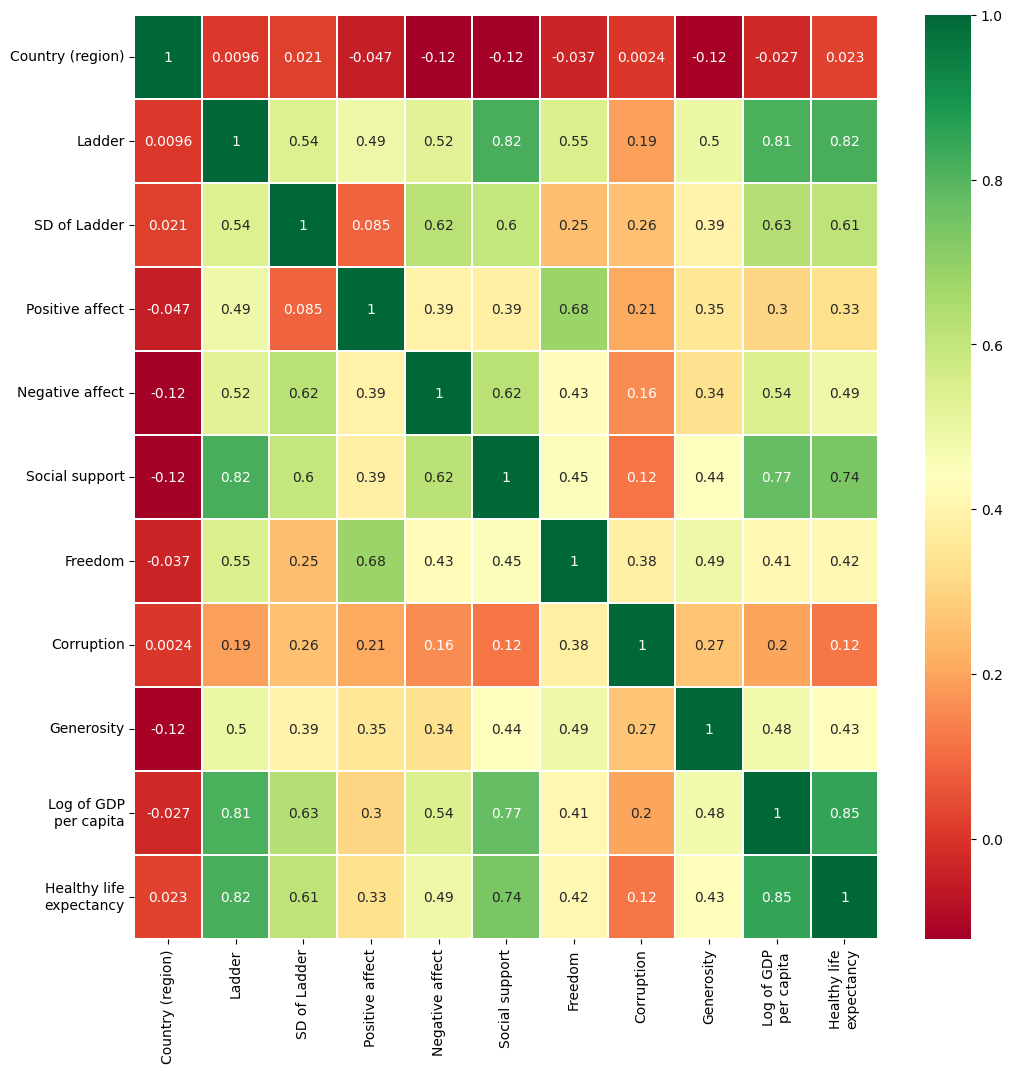

In [37]:
import seaborn as sns
sns.heatmap(cf.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

In [38]:
gf = df.copy(deep=True)

In [39]:
pd.get_dummies(gf, columns=['Country (region)'], drop_first= True )

Ladder  SD of Ladder  Positive affect  Negative affect  Social support  \
0         1             4             41.0             10.0             2.0   
1         2            13             24.0             26.0             4.0   
2         3             8             16.0             29.0             3.0   
3         4             9              3.0              3.0             1.0   
4         5             1             12.0             25.0            15.0   
..      ...           ...              ...              ...             ...   
151     152            63             54.0            102.0           144.0   
152     153           122             78.0             50.0           131.0   
153     154            25            152.0            133.0           151.0   
154     155           117            132.0            153.0           155.0   
155     156           140            127.0            152.0           148.0   

     Freedom  Corruption  Generosity  Log of GDP\nper capita  \
0        5.0         4.0        47.0                    22.0   
1        6.0         3.0        22.0                    14.0   
2        3.0         8.0        11.0                     7.0   
3        7.0        45.0         3.0                    15.0   
4       19.0        12.0         7.0                    12.0   
..       ...         ...         ...                     ...   
151     21.0         2.0        90.0                   132.0   
152     78.0        34.0        49.0                   125.0   
153    155.0       136.0       137.0                   134.0   
154    133.0       122.0       113.0                   152.0   
155    154.0        61.0        85.0                   140.0   

     Healthy life\nexpectancy  ...  Country (region)_United Arab Emirates  \
0                        27.0  ...                                  False   
1                        23.0  ...                                  False   
2                        12.0  ...                                  False   
3                        13.0  ...                                  False   
4                        18.0  ...                                  False   
..                        ...  ...                                    ...   
151                     103.0  ...                                  False   
152                     118.0  ...                                  False   
153                     139.0  ...                                  False   
154                     150.0  ...                                  False   
155                     143.0  ...                                  False   

     Country (region)_United Kingdom  Country (region)_United States  \
0                              False                           False   
1                              False                           False   
2                              False                           False   
3                              False                           False   
4                              False                           False   
..                               ...                             ...   
151                            False                           False   
152                            False                           False   
153                            False                           False   
154                            False                           False   
155                            False                           False   

     Country (region)_Uruguay  Country (region)_Uzbekistan  \
0                       False                        False   
1                       False                        False   
2                       False                        False   
3                       False                        False   
4                       False                        False   
..                        ...                          ...   
151                     False                        False   
1

In [40]:
pd.get_dummies(gf, columns=['Country (region)'], drop_first= True ).corr()

Ladder  SD of Ladder  Positive affect  \
Ladder                      1.000000      0.539362         0.491432   
SD of Ladder                0.539362      1.000000         0.085381   
Positive affect             0.491432      0.085381         1.000000   
Negative affect             0.523643      0.619267         0.389697   
Social support              0.817842      0.599464         0.386269   
...                              ...           ...              ...   
Country (region)_Venezuela  0.052618      0.111478        -0.001801   
Country (region)_Vietnam    0.027647     -0.091858         0.077442   
Country (region)_Yemen      0.129314      0.011594         0.135073   
Country (region)_Zambia     0.106127      0.118613         0.010806   
Country (region)_Zimbabwe   0.120396      0.079372        -0.027015   

                            Negative affect  Social support   Freedom  \
Ladder                             0.523643        0.817842  0.546777   
SD of Ladder                       0.619267        0.599464  0.251856   
Positive affect                    0.389697        0.386269  0.681770   
Negative affect                    1.000000        0.621888  0.430241   
Social support                     0.621888        1.000000  0.448903   
...                                     ...             ...       ...   
Country (region)_Venezuela         0.102656       -0.052228  0.120665   
Country (region)_Vietnam          -0.091850       -0.025214 -0.099054   
Country (region)_Yemen            -0.005403        0.039621  0.124267   
Country (region)_Zambia            0.090049        0.066636 -0.009005   
Country (region)_Zimbabwe         -0.079243        0.057631  0.032418   

                            Corruption  Generosity  Log of GDP\nper capita  \
Ladder                        0.190071    0.497856                0.813367   
SD of Ladder                  0.258639    0.392154                0.629662   
Positive affect               0.209659    0.354877                0.304522   
Negative affect               0.158903    0.338226                0.542143   
Social support                0.118434    0.442432                0.772912   
...                                ...         ...                     ...   
Country (region)_Venezuela    0.068534    0.109859                0.002782   
Country (region)_Vietnam      0.022201    0.034219                0.052858   
Country (region)_Yemen        0.016410    0.138675                0.119627   
Country (region)_Zambia      -0.010618   -0.045024                0.071405   
Country (region)_Zimbabwe    -0.022201    0.113461                0.101080   

                            Healthy life\nexpectancy  ...  \
Ladder                                      0.816740  ...   
SD of Ladder                                0.611376  ...   
Positive affect                             0.332839  ...   
Negative affect                             0.488649  ...   
Social support                              0.740728  ...   
...                                              ...  ...   
Country (region)_Venezuela                 -0.008514  ...   
Country (region)_Vietnam                   -0.050137  ...   
Country (region)_Yemen                      0.091761  ...   
Country (region)_Zambia                     0.105005  ...   
Country (region)_Zimbabwe                   0.101221  ...   

                            Country (region)_United Arab Emirates  \
Ladder                                                  -0.102560   
SD of Ladder                                            -0.024079   
Positive affect                                         -0.063034   
Negative affect                                         -0.039621   
Social support                                          -0.010806   
...                                                           ...   
Country (region)_Venezuela                              -0.006452   
Country (region)_Vietnam                                -0.006452   
Country (

In [42]:
import seaborn as sns
sns.heatmap(pd.get_dummies(gf, columns=['Country (region)'], drop_first= True ).corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(120,120)
plt.show()

Загрузить таблицу цен на авокадо: 

In [44]:
av=pd.read_csv('avocado.csv')
av[:3]

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany

Сделать частотный график колонки AveragePrice. Какое это распределение?

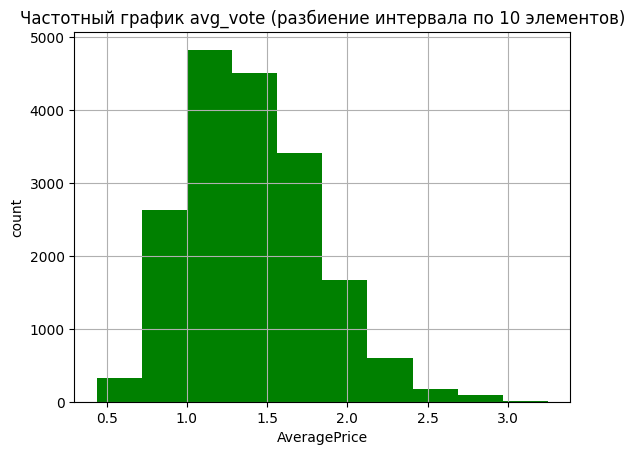

In [47]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(av['AveragePrice'], 10, facecolor='g')

plt.xlabel('AveragePrice')
plt.ylabel('count')
plt.title('Частотный график avg_vote (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

нормальное со сдвигом влево

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

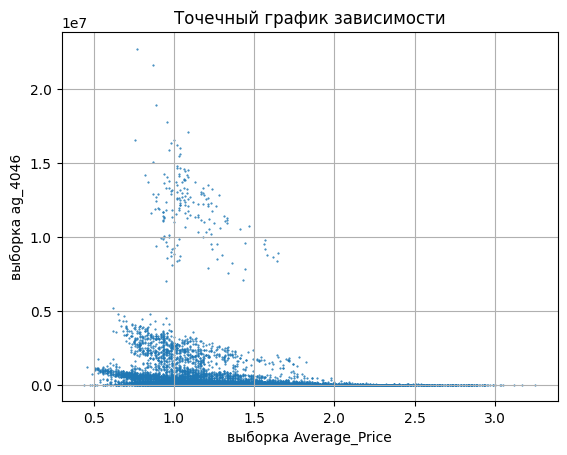

In [54]:
Average_Price = av['AveragePrice']
ag_4046= av['4046']
plt.xlabel('выборка Average_Price')
plt.ylabel('выборка ag_4046')
plt.title('Точечный график зависимости')
plt.grid(True)
plt.scatter(Average_Price, ag_4046, marker='.',s=1)

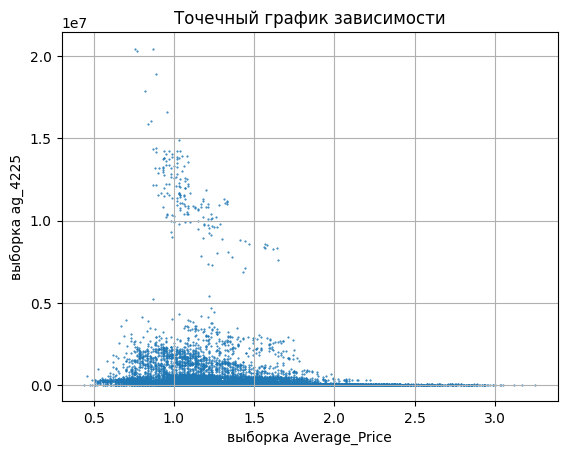

In [55]:
Average_Price = av['AveragePrice']
ag_4225= av['4225']
plt.xlabel('выборка Average_Price')
plt.ylabel('выборка ag_4225')
plt.title('Точечный график зависимости')
plt.grid(True)
plt.scatter(Average_Price, ag_4225, marker='.',s=1)

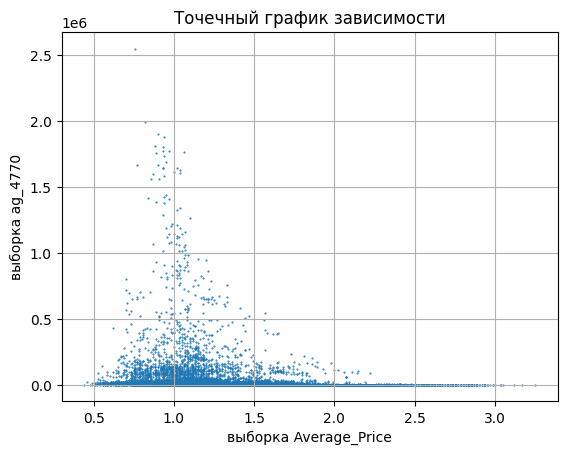

In [56]:
Average_Price = av['AveragePrice']
ag_4770= av['4770']
plt.xlabel('выборка Average_Price')
plt.ylabel('выборка ag_4770')
plt.title('Точечный график зависимости')
plt.grid(True)
plt.scatter(Average_Price, ag_4770, marker='.',s=1)

In [57]:
from scipy.stats import pearsonr

In [58]:
corr, p_value = pearsonr(av['AveragePrice'], av['4770'])
print(corr)

-0.1794459839797562


In [59]:
corr, p_value = pearsonr(av['AveragePrice'], av['4225'])
print(corr)

-0.1729277725093354


In [60]:
corr, p_value = pearsonr(av['AveragePrice'], av['4046'])
print(corr)

-0.20831704848788477
